# 第04章
- neko.txtをMeCabを使って形態素解析し、その結果をneko.txt.mecabに保存
- これを使って以下の問いに答えよう

## 00 neko.txt.mecabを作る

In [1]:
import MeCab
mc = MeCab.Tagger('mecabrc')

with open ('neko.txt', mode='r', encoding='utf-8') as f:
    s = f.read()

with open('neko.txt.mecab', mode='w', encoding='utf-8') as f:
    f.write(mc.parse(s))

### MeCabの出力フォーマット
- 表層形\t品詞,品詞細分類1,品詞細部類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [2]:
# neko.txt.mecab を読み込む
with open('./neko.txt.mecab', 'r', encoding='utf-8') as f:
    s = f.readlines()

## 30 形態素解析結果の読み込み
- 表層形・原形・品詞・品詞細分類1 をキーとする辞書に格納
- surface, base, pos, pos1をキーとする辞書の配列を作ろうかなと思います

In [3]:
import re

ds = []
for i in range(len(s)):
    if s[i] != 'EOS\n':
        reg = re.findall('^([^\t]*)\t([^,]*),([^,]*),[^,]*,[^,]*,[^,]*,[^,]*,([^,]*).*', s[i])
        d = dict(surface=reg[0][0], base=reg[0][3], pos=reg[0][1], pos1=reg[0][2])
        ds.extend([d])

## 31 動詞
- 動詞の表層形を全て抽出せよ


## 32 動詞の原形
- 動詞の原形を全て抽出せよ

In [4]:
ds[9]['pos']

'助詞'

In [5]:
v_surface = []
v_base = []
for i in range(len(ds)):
    if ds[i]['pos'] == '動詞':
        v_surface += ds[i]['surface']
        v_base += ds[i]['base']

## 33 「AのB」
- 2つの名詞が「の」で連結されている名詞句を抽出せよ

In [6]:
nlp33 = []
for i in range(1, len(ds)-1):
    if ds[i]['surface'] == 'の'  and  ds[i-1]['pos'] == '名詞'  and  ds[i+1]['pos']=='名詞':
        add_data = ''.join([ds[i-1]['surface'], ds[i]['surface'], ds[i+1]['surface']])
        nlp33 += [add_data]

## 34 名詞の連接
- 連続して出現する名詞を最長一致で

In [7]:
nlp34 = []
i = 0
while i < len(ds):
    if ds[i]['pos'] == '名詞'  and  ds[i+1]['pos'] == '名詞':
        add_data = ''
        add_data = add_data.join(ds[i]['surface'])
        while i+1 < len(ds)  and  ds[i+1]['pos'] == '名詞':
            add_data += ds[i+1]['surface']
            i += 1
        nlp34 += [add_data]
    i += 1

## 35 単語の出現頻度
- 文章中に出現する単語とその出現頻度を求め、出現頻度の高い順に並べる

In [8]:
words = {}
for i in range(len(ds)):
    if ds[i]['base'] in words:
        words[ds[i]['base']] += 1
    elif ds[i]['pos'] == '名詞'  and  ds[i]['base'] != '*\n':
        words[ds[i]['base']] = 1
words = sorted(words.items(), reverse=True, key=lambda x:x[1])
words[1:11]

[('ん', 1564),
 ('事', 1207),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('へ', 743),
 ('よう', 697),
 ('人', 602),
 ('ば', 583),
 ('一', 554)]

### ソートからそれに関連してλ式についての色々まで
- `list.sort()`…元のリストを書き換える形で昇順ソート
    - 引数に`reverse=True`を叩き込むと降順
- `sorted_list = sorted(list)`…ソートされた新しいリストを作る
    - 降順にしたいときは`sorted(list, reverse=True)`


- 辞書のソート
    - `dict.sort()`は無い
    - `sorted()`は本来リストをソートするもの。文字列やタプルは自動でリスト化されてソートされる
    - 辞書型の場合は、`dict.items()`でタプルのリスト化する。
        - `{'a':1, 'b:2}.items() = [('a', 1), ('b', 2)]`
    - 以下、二次元の配列として扱う


- 二次元配列`target_list`のソート
    - リストの各要素を引数とする関数`f`を`key`に指定して(`sorted(key=f)`)、どの要素でソートするか決める必要がある
        - `for i in target_list:`
            - `f(i) => 比較要素`
    - `f`に`lambda`式を指定することも可能


- `lambda`式
    - `lambda 引数: 返り値`
    - 以下と同じ
    - `def f(引数):`
        - `return 返り値`

In [9]:
a = (3,4,5,6)
sorted(a, reverse=True)

[6, 5, 4, 3]

## 36 頻度上位10語
- 棒グラフとかで

C:\ProgramData\Anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


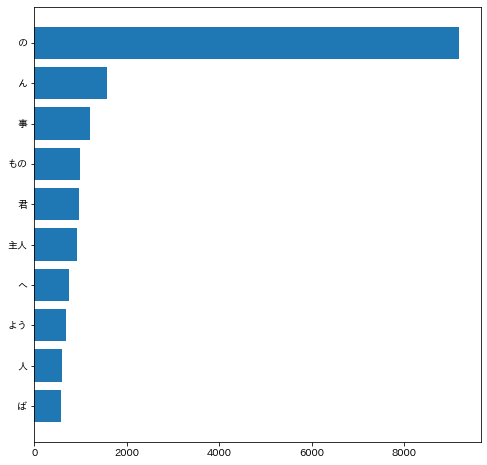

In [10]:
top_ten = words[0:10]
top_ten = sorted(top_ten, key=lambda x:x[1])

import matplotlib.pyplot as plt
import japanize_matplotlib

labels = [a[0] for a in top_ten]
values = [a[1] for a in top_ten]
plt.figure(figsize=(8, 8))
plt.barh(labels, values)
plt.show()

## 37 「猫」と共起頻度の高い上位10語
- 「猫」とよく共起する(共起頻度が高い)10語とその出現頻度をグラフで表示せよ

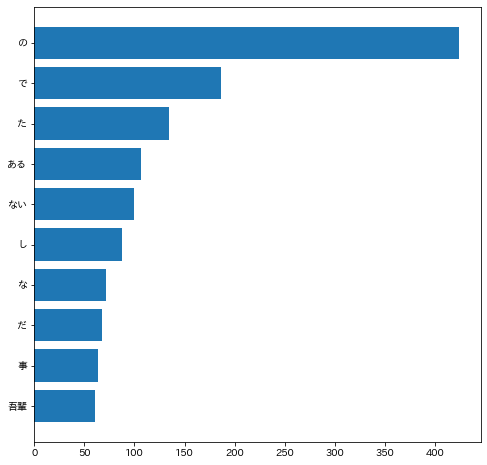

In [11]:
with_cat = {}
for i in range(len(ds)):
    if ds[i]['surface'] == '猫':
        for j in range(1, i+1):
            if ds[i-j]['surface'] == '。' or ds[i-j]['surface'] == '猫':
                break
            elif ds[i-j]['surface'] in with_cat:
                with_cat[ds[i-j]['surface']] += 1
            elif ds[i-j]['pos'] != '助詞' and ds[i-j]['pos'] != '記号':
                with_cat[ds[i-j]['surface']] = 1
        for j in range(1, len(ds)):
            if ds[i+j]['surface'] == '。' or ds[i+j]['surface'] == '猫':
                break
            elif ds[i+j]['surface'] in with_cat:
                with_cat[ds[i+j]['surface']] += 1
            elif ds[i+j]['pos'] != '助詞' and ds[i+j]['pos'] != '記号':
                with_cat[ds[i+j]['surface']] = 1


with_cat = sorted(with_cat.items(), key=lambda x:x[1])
with_cat_top10 = with_cat[len(with_cat)-10 : len(with_cat)]
key = [a[0] for a in with_cat_top10]
value = [a[1] for a in with_cat_top10]
plt.figure(figsize=(8, 8))
plt.barh(key, value)
plt.show()

## 38 ヒストグラム
- 単語の出現頻度のヒストグラム(横軸に出現頻度・縦軸に単語の種類数、の棒グラフ)を描け

<function matplotlib.pyplot.show(*args, **kw)>

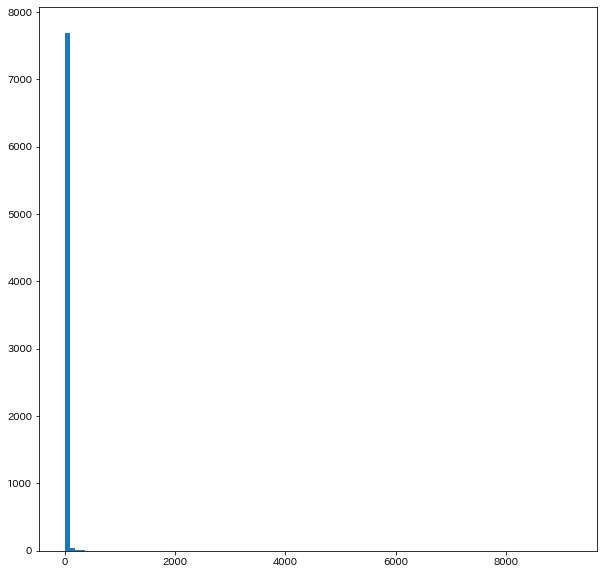

In [14]:
freq = [a[1] for a in words]
plt.figure(figsize=(10,10))
plt.hist(freq, bins=100)
plt.show

## 39 Zipfの法則
- 単語の出現頻度順位を横軸、その出現頻度を縦軸として、両対数グラフをプロットせよ


### ジップの法則
- 出現頻度が$k$番目に大きい要素が全体に占める割合は$\frac{1}{k}$に比例する、という経験則
- 要は、出現頻度が大きければ全体における割合も大きい

<function matplotlib.pyplot.show(*args, **kw)>

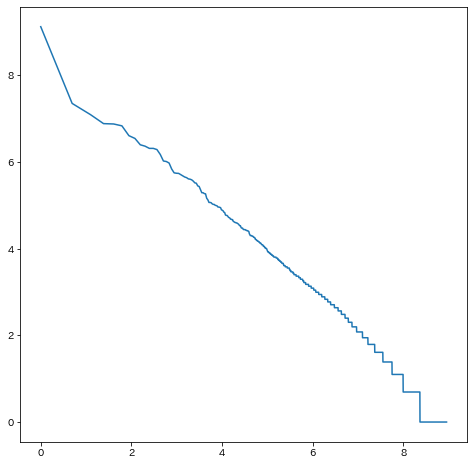

In [20]:
import math

freq2 = [math.log(a[1]) for a in words]
no = [math.log(i+1) for i in range(len(freq2))]

plt.figure(figsize=(8,8))
plt.plot(no, freq2)
plt.show